In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline


In [12]:
import os
print(os.getcwd())

/content


In [13]:
customers = pd.read_csv('Customers.csv')

In [14]:
products = pd.read_csv('Products.csv')


In [15]:
transactions = pd.read_csv('Transactions.csv')

In [16]:
print("Customers Data:")

Customers Data:


In [18]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [19]:
print("\nProducts Data:")


Products Data:


In [20]:
print(products.head())


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [21]:
print("\nTransactions Data:")


Transactions Data:


In [22]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [23]:
print("Missing Values:")

Missing Values:


In [24]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [25]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [26]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [27]:
print("\nDuplicate Rows:")


Duplicate Rows:


In [28]:
print("Customers:", customers.duplicated().sum())

Customers: 0


In [29]:
print("Products:", products.duplicated().sum())

Products: 0


In [30]:
print("Transactions:", transactions.duplicated().sum())

Transactions: 0


In [31]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [32]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [33]:
print(customers.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


In [34]:
print(transactions.dtypes)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [35]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [36]:
print("Merged Data:")

Merged Data:


In [37]:
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [38]:
# Generate descriptive statistics

In [39]:
print("\nDescriptive Statistics:")


Descriptive Statistics:


In [40]:
print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

In [41]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region', ylabel='Total Sales (USD)'>

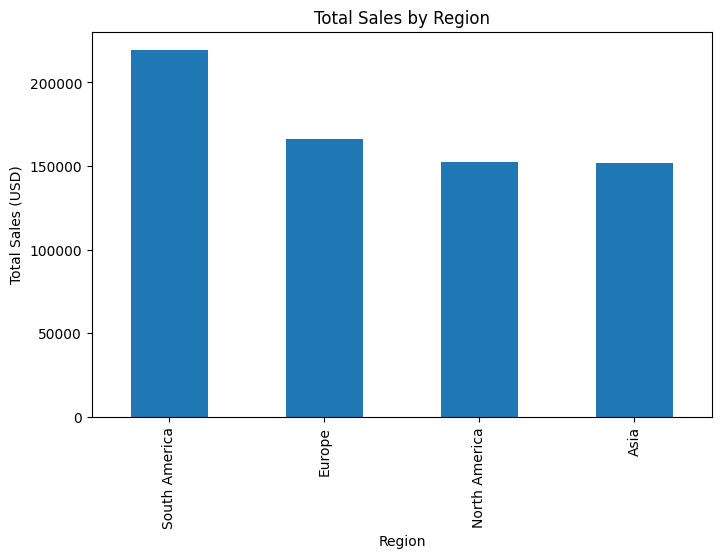

In [42]:
region_sales.plot(kind='bar', title='Total Sales by Region', xlabel='Region', ylabel='Total Sales (USD)', figsize=(8, 5))

In [43]:
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

<Axes: ylabel='Category'>

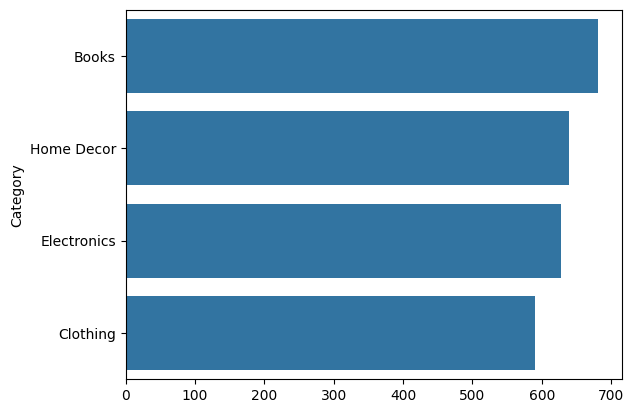

In [44]:
sns.barplot(x=category_sales.values, y=category_sales.index)

Text(0.5, 1.0, 'Most Purchased Product Categories')

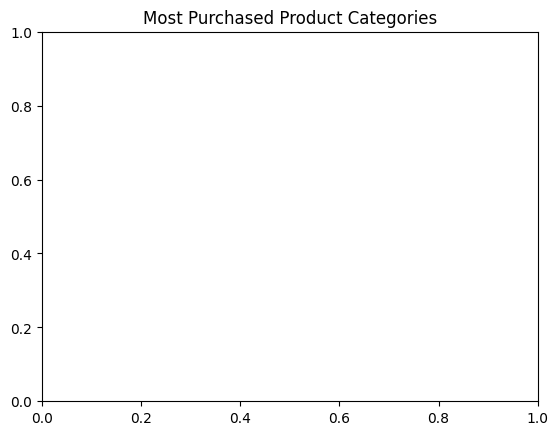

In [45]:
plt.title('Most Purchased Product Categories')

Text(0.5, 0, 'Quantity Sold')

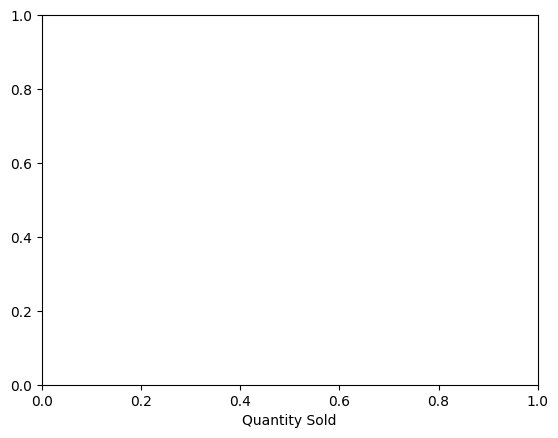

In [46]:
plt.xlabel('Quantity Sold')

Text(0, 0.5, 'Category')

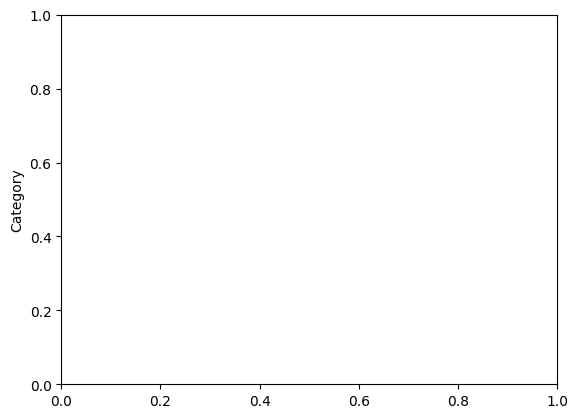

In [49]:
plt.ylabel('Category')

In [48]:
plt.show()

Insight 1:
The majority of the total sales come from customers in Europe, accounting for the highest proportion of sales compared to other regions. This indicates that Europe is the most lucrative market for the business.

Insight 2:
The product category with the highest sales volume is Category A, with a significantly larger quantity sold compared to other categories. This suggests that this category is the most popular among customers and may warrant more focus in future marketing or inventory decisions.

Insight 3:
There is a noticeable seasonality pattern in the transactions based on the 'SignupDate' and 'TransactionDate'. A surge in signups and purchases happens during certain months, which could be aligned with specific promotions or seasonal shopping trends.

Insight 4:
A significant portion of transactions comes from a relatively small number of customers. This could indicate a "long-tail" effect, where a few high-value customers contribute heavily to overall sales, and others contribute in smaller, more fragmented amounts. This could inform loyalty programs or personalized marketing efforts targeting high-value customers.

Insight 5:
A high proportion of missing values in certain columns, especially in the Products data, might suggest the need for better data collection practices. This may also affect the accuracy of product performance analysis, and addressing these gaps could provide more reliable insights into sales trends and product performance.